In [ ]:
# Import libraries
import matplotlib.pyplot as plt # Library for creating graphs
from collections import defaultdict # Handles missing keys
from typing import Dict # Type hint for dictionary return values

In [ ]:
def read_dna_sequence(filename):
    """
    Read DNA sequences from a file and return a list of sequence tuples.
    """
    sequences = [] # List to store sequence tuples
    
    # Open and read the file. (Adapted from fundamentals part 2)
    with open(f"{filename}") as file:
        current_id = "" #Store current sequence ID
        sequence = "" #Store current sequence data
        
        # Process file line by line
        for line in file:
            line = line.strip()  # Remove whitespace
            
            # Check for sequence ID line (starts with >)
            if line.startswith('>'):
                if current_id:
                    sequences.append((current_id, sequence))
                current_id = line[1:] # Store ID without > symbol
                sequence = "" # Reset the sequence string
            else:
                sequence += line # Add line to current sequence
                
        # Add final sequence if exists        
        if current_id: # Append the last sequence
            sequences.append((current_id, sequence)) # Save the last sequence
    return sequences        

In [ ]:
def count_dna_letters(sequence: str) -> Dict[str, int]:
    """
    Count the frequency of each DNA letter in a sequence.
    Returns dictionary with lowercase letters as keys and counts as values.
    """
    sequence = sequence.upper() # Convert to uppercase
    counts = defaultdict(int) # Dictionary starts on 0
    
    # Count each valid DNA letter (A, T, C, G)
    for letter in sequence:
        if letter in 'ATCG': # Only count valid DNA letters
            counts[letter] += 1
            
    # Convert to lowercase for display
    lower_counts = {k.lower(): v for k, v in counts.items()}
    # Convert defaultdict to regular dictionary and return
    return dict(lower_counts)


In [ ]:
def plot_dna_frequencies(sequence_id: str, counts: Dict[str, int]):
    """
    Create bar plot showing frequency of each DNA letter.
    Takes sequence ID and letter count dictionary as input.
    """
    # Convert to lowercase and prepare data
    lower_counts = {k.lower(): v for k, v in counts.items()}
    letters = sorted(lower_counts.keys())
    frequencies = [lower_counts[letter] for letter in letters]
    
    # Extract sequence number from ID for title
    sequence_number = sequence_id.replace('seq', '')
    
    # Create and configure plot settings
    plt.figure(figsize=(8,6))
    plt.bar(letters, frequencies, color='blue')
    plt.title(f'DNA sequence {sequence_number}')
    plt.xlabel('DNA Letters')
    plt.ylabel('Frequency')
    plt.ylim(0, max(frequencies) + 2)
    plt.grid(False)
    plt.show()

In [ ]:
def analyze_dna_file(filename: str):
    """
    Main analysis function. Reads DNA file, counts letters,
    and generates frequency plots for each sequence.
    """
    # Read all sequences from the input file
    sequences = read_dna_sequence(filename)
    
    # Process each sequence in the file
    for seq_id, sequence in sequences:
        # Print which sequence is being analyzed
        print(f"\nAnalyzing sequence: {seq_id}")
        
        # Count DNA letters and display results
        counts = count_dna_letters(sequence)
        print("Letter count:", counts)
        
        # Create and show frequency plot for this sequence
        plot_dna_frequencies(seq_id, counts)

Analysing simple DNA sequences:

Analyzing sequence: seq1
Letter count: {'c': 8, 'g': 2, 't': 7, 'a': 17}


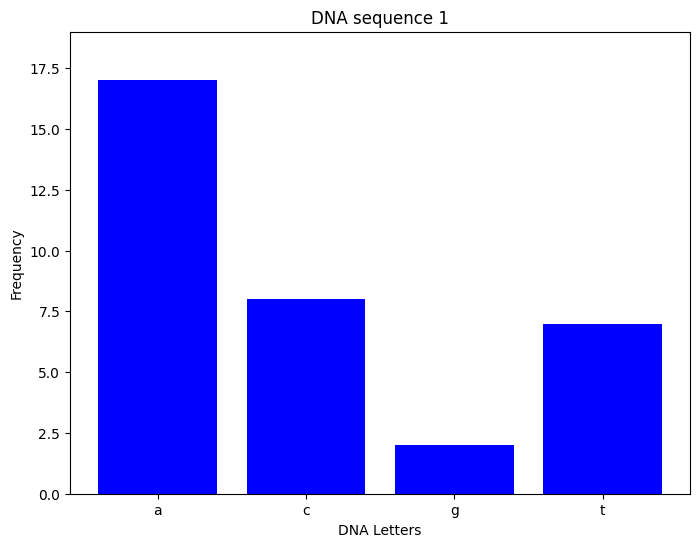


Analyzing sequence: seq2
Letter count: {'a': 3, 'g': 10, 'c': 4, 't': 7}


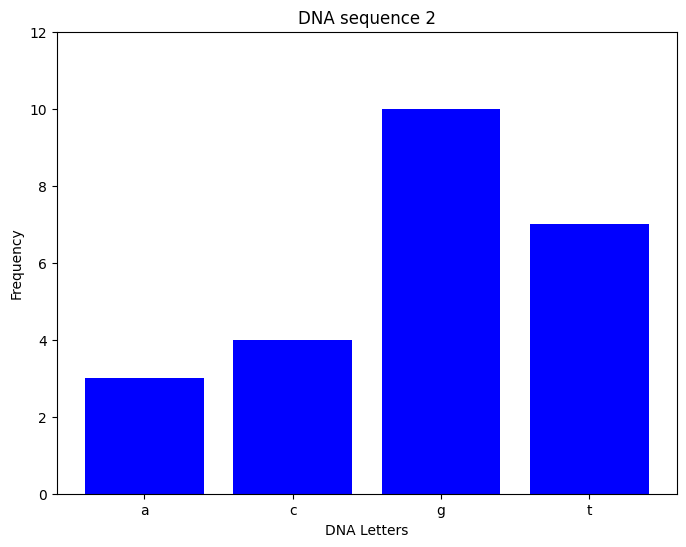


Analyzing sequence: seq3
Letter count: {'g': 16, 'c': 16, 'a': 18, 't': 10}


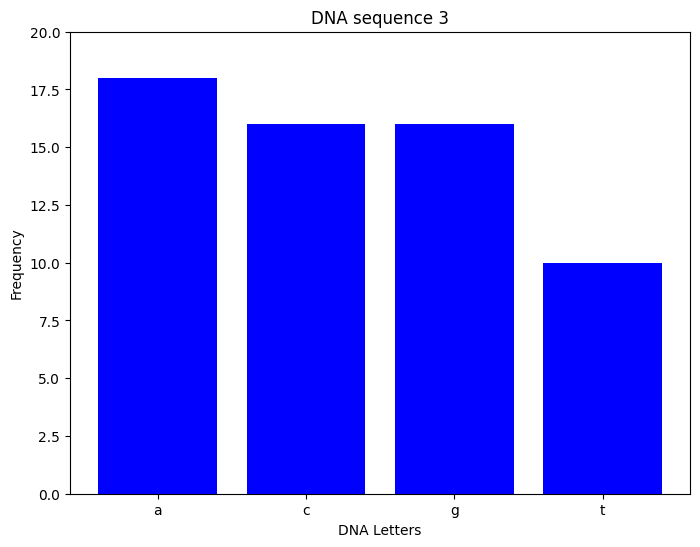


Analyzing sequence: seq4
Letter count: {'g': 18, 'c': 11, 'a': 13, 't': 10}


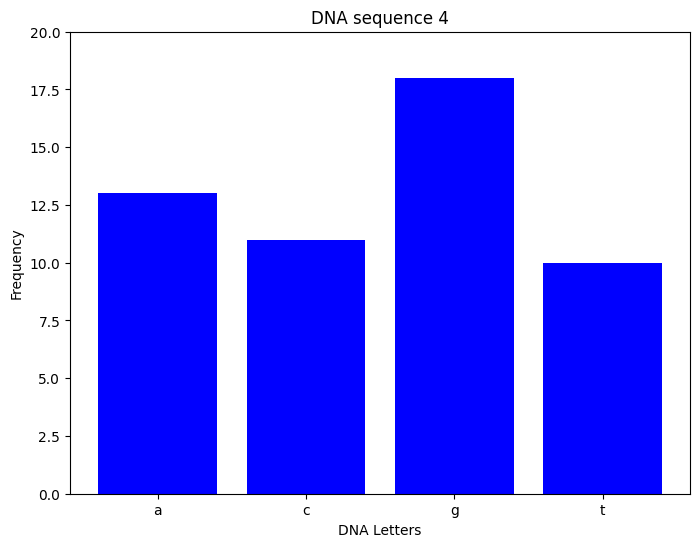

In [ ]:
# Task 1 - Analyze simple DNA sequences
if __name__ == "__main__":
    
    print("Analysing simple DNA sequences:")
    analyze_dna_file("data/dna_raw.txt")

Analysing complicated DNA sequences:

Analyzing sequence: seq1
Letter count: {'c': 8, 'g': 2, 't': 7, 'a': 17}


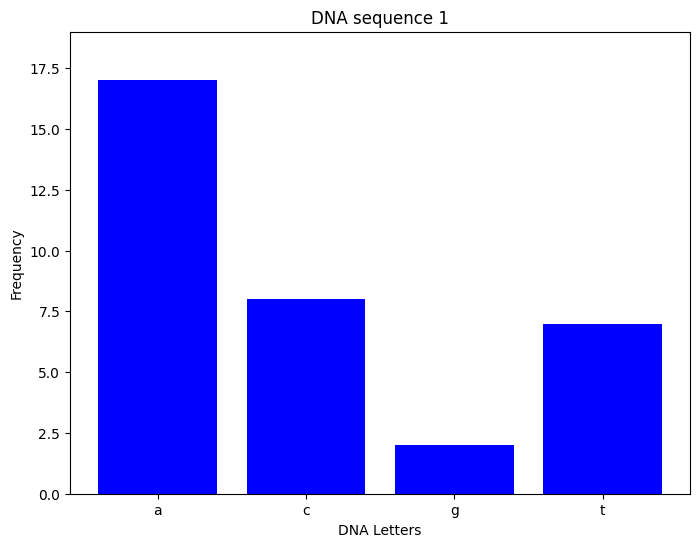


Analyzing sequence: seq2
Letter count: {'a': 3, 'g': 10, 'c': 4, 't': 7}


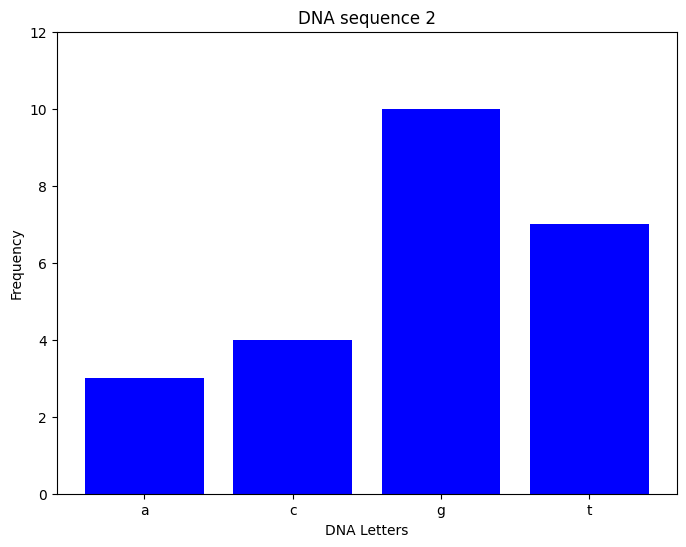


Analyzing sequence: seq3
Letter count: {'g': 21, 'c': 34, 'a': 36, 't': 19}


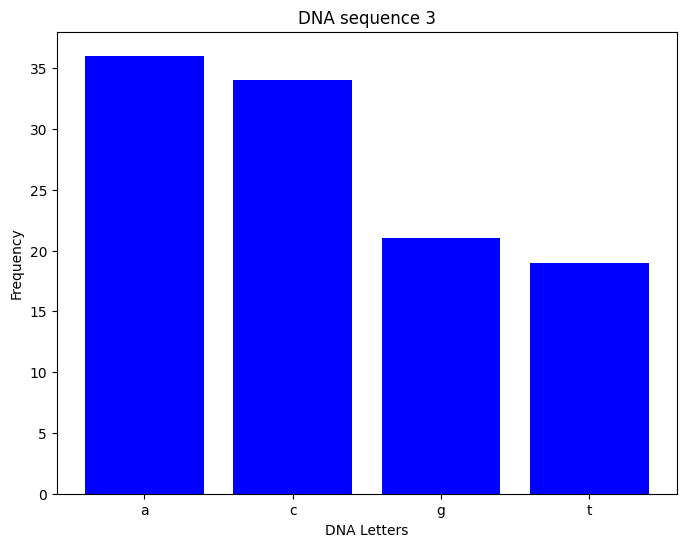


Analyzing sequence: seq4
Letter count: {'g': 20, 'c': 15, 'a': 17, 't': 12}


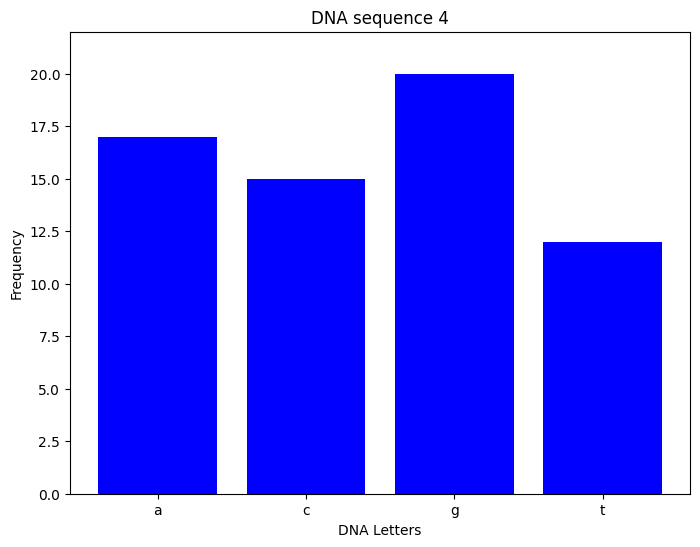

In [ ]:
# Task 2 - Analyze complicated DNA sequences
if __name__ == "__main__":
    
    print("Analysing complicated DNA sequences:")
    analyze_dna_file("data/dna_raw_complicated.txt")